In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("C:\\J Notebook Practice\\Data files\\1.04.+Real-life+example.csv")
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [3]:
data = raw_data.drop(["Model"],axis = 1)
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [4]:
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
q = data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"]<q]
data_1.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [6]:
q = data_1["Mileage"].quantile(0.99)
data_2 = data_1[data_1["Mileage"]<q]
data_2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [7]:
data_3 = data_2[data_2["EngineV"]<6.5]
data_3.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


In [8]:
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"]>q]
data_4.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [9]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# OLS Assumptions
#Linearity

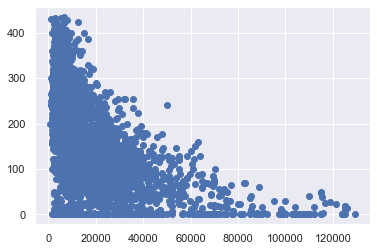

In [10]:
plt.scatter(data_cleaned["Price"],data_cleaned["Mileage"])
plt.show()

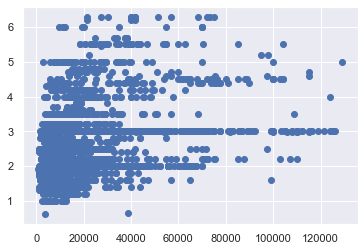

In [11]:
plt.scatter(data_cleaned["Price"],data_cleaned["EngineV"])
plt.show()

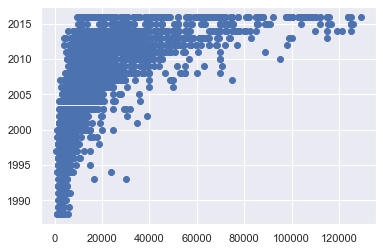

In [12]:
plt.scatter(data_cleaned["Price"],data_cleaned["Year"])
plt.show()

In [13]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


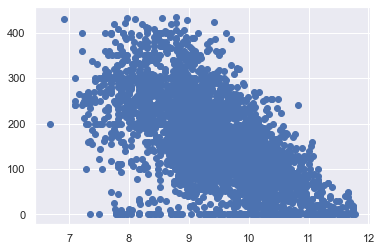

In [14]:
plt.scatter(data_cleaned["log_price"],data_cleaned["Mileage"])
plt.show()

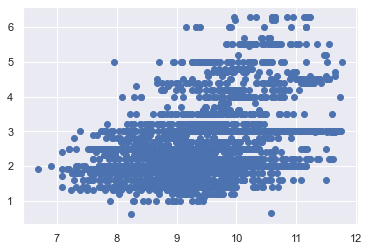

In [15]:
plt.scatter(data_cleaned["log_price"],data_cleaned["EngineV"])
plt.show()

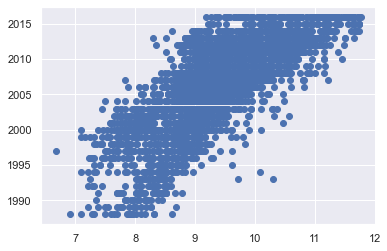

In [16]:
plt.scatter(data_cleaned["log_price"],data_cleaned["Year"])
plt.show()

In [17]:
data_cleaned = data_cleaned.drop(["Price"],axis=1)
data_cleaned.describe(include="all")

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


# multi-collinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [19]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [20]:
data_no_multicollinearity = data_cleaned.drop(["Year"],axis=1)
data_no_multicollinearity.describe(include="all")

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


# dummy variables

In [21]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [22]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype=object)

In [23]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes']

In [24]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,8.342840,277,2.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,8.974618,427,2.9,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,9.495519,358,5.0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,10.043249,240,4.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,9.814656,120,2.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


# Linear regression model

In [25]:
#inputs and targets
targets = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(["log_price"],axis=1)

In [26]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [27]:
inputs_scaled = scaler.transform(inputs)

In [28]:
#train and test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 356)

In [29]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [30]:
y_hat = reg.predict(x_train)

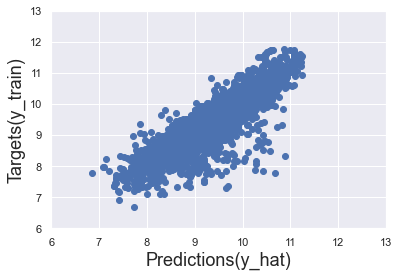

In [31]:
#compairing the predictions with training values
plt.scatter(y_hat,y_train)
plt.xlabel("Predictions(y_hat)", size = 18)
plt.ylabel("Targets(y_train)", size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

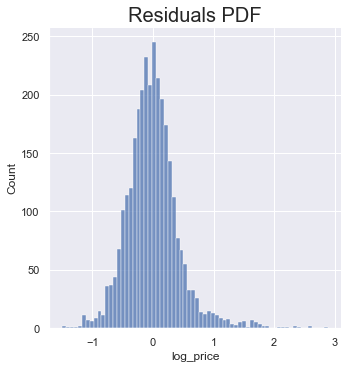

In [32]:
#compairing using residuals
sns.displot(y_hat-y_train)
plt.title("Residuals PDF", size = 20)
plt.show()

In [33]:
#r-square
reg.score(x_train,y_train)

0.7467861102805952

In [34]:
reg.intercept_

9.412691530977101

In [35]:
reg.coef_

array([-4.62359479e-01,  2.07974688e-01, -2.06907691e+12, -2.47763337e+12,
       -2.66971279e+12, -1.80719290e+12, -2.12166356e+12, -2.25598625e+12,
       -2.78676762e+12, -2.62954169e+11, -1.60894139e+11, -1.91396754e+11,
       -3.15723253e+11, -1.91858458e+11, -2.37169964e+11, -2.73840653e+12,
       -1.94290050e+12, -8.66878596e+11, -2.63487879e+12,  1.78860459e+11,
        1.78860459e+11])

# testing

In [36]:
y_hat_test = reg.predict(x_test)

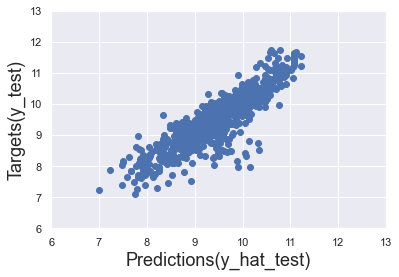

In [37]:
plt.scatter(y_hat_test,y_test)
plt.xlabel("Predictions(y_hat_test)",size = 18)
plt.ylabel("Targets(y_test)",size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()